In [1]:
%reset -f

# Handle parent directory
import sys
import os

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser(os.path.abspath('')))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
# print(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))

# Test subject
from project.domain.Stock import Stock
from project.domain.Portfolio import Portfolio

# Pytest tools
import pytest

# Testing dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

###

test_data_path = "data/TS.csv"


In [232]:

# PROJECT I/O PARAMETERS
test_stock_path = "data/{}.csv"

# PORTFOLIO
weights = np.array([ [0.40], [0.25], [0.15], [0.10], [0.10] ])
tickers = ["TS", "TSB", "TSC", "TSD", "TSE"]
companies = ["TS", "TS Beta", "TS Charlie", "TS Delta", "TS Echo"]
entries = dict(zip(tickers, companies))

stocks = list()
for ticker, company in entries.items():
    history = pd.read_csv(test_stock_path.format(ticker))
    stocks.append(Stock(ticker, company, history))

TestPortfolio = Portfolio("Test Portfolio", stocks, weights)

# INDEX
Index = Stock("^INDX", "Generic Index", pd.read_csv(test_stock_path.format("^INDX")))

# TIMING PARAMETERS
start_date = "1900-01-01"
end_date = "1901-01-01"

# MARKET PARAMETERS
risk_free_rate = 0.0165


individual_stocks = TestPortfolio.daily_individual_rates_of_return(start_date, end_date)
portfolio_combined = TestPortfolio.daily_combined_rate_of_return(start_date, end_date)
excess_rates = TestPortfolio.daily_excess_rates_of_return(risk_free_rate, start_date, end_date)
average_daily_return = TestPortfolio.average_daily_rate_of_return(start_date, end_date)
average_annual_return = TestPortfolio.average_annual_rate_of_return(start_date, end_date)
individual_variances = TestPortfolio.individual_variances(start_date, end_date)
covariance_matrix = TestPortfolio.covariance_matrix(start_date, end_date)
variance = TestPortfolio.variance(start_date, end_date)
annual_std = TestPortfolio.annual_standard_deviation(start_date, end_date)
annual_volatility = TestPortfolio.volatility(start_date, end_date)
correlation_matrix = TestPortfolio.correlation_matrix(start_date, end_date)
betas_matrix = TestPortfolio.individual_betas(Index, start_date, end_date)
beta = TestPortfolio.beta(Index, start_date, end_date)
systematic_risk = TestPortfolio.systematic_risk(Index, start_date, end_date)
idiosyncratic_risk = TestPortfolio.idiosyncratic_risk(Index, start_date, end_date)
sharp_ratio = TestPortfolio.sharpe_ratio(risk_free_rate, start_date, end_date)
marko_data = TestPortfolio.markowitz_efficient_frontier(1000, risk_free_rate, "figures/marko", start_date, end_date)





In [253]:

for i in range(len(marko_data)):
    if round(sum(marko_data[i]["Weights"])[0], 3) == 1.000:
        continue
    else:
        print("Oops!")
        break
    



0.9999999999999998

<AxesSubplot:>

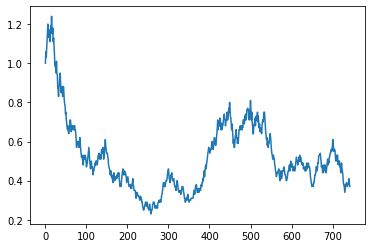

In [13]:
stock.history.iloc[:,5].plot()

In [3]:
stock.history

,Date,Open,High,Low,Close,Adj Close,Volume
0,1900-01-02,1.00,1.01,0.97,1.00,1.00,767000
1,1900-01-03,1.00,1.07,1.04,1.06,1.06,2207000
2,1900-01-04,1.06,1.06,1.00,1.03,1.03,892000
3,1900-01-05,1.03,1.09,1.06,1.07,1.07,729000
4,1900-01-08,1.07,1.11,1.10,1.10,1.10,1216000
...,...,...,...,...,...,...,...
738,1902-12-22,0.38,0.39,0.35,0.38,0.38,991000
739,1902-12-23,0.38,0.42,0.38,0.39,0.39,1289000
740,1902-12-29,0.39,0.42,0.41,0.41,0.41,2545000
741,1902-12-30,0.41,0.41,0.39,0.39,0.39,2155000
